In [2]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga dataset homicidios.xlsx
homicidios = pd.read_excel('datasets/homicidios.xlsx')

In [4]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Registros: 696

En primera instancia la mayor cantidad de nulos se encuentran en:
- Altura (567)
- Cruce (171)
- Dirección Normalizada (8)
- Calle (1)

In [5]:
homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [6]:
print(homicidios.isnull().sum())

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


In [7]:

print(homicidios.isna().sum())

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


Las ocurrencias de los valores null y NaN se corresponden

In [8]:
# Contar ocurrencias de 'SD' (Sin Datos) en cada columna
conteo_SD = homicidios.map(lambda x: 1 if x == 'SD' else 0).sum()

print(conteo_SD)

ID                        0
N_VICTIMAS                0
FECHA                     0
AAAA                      0
MM                        0
DD                        0
HORA                      1
HH                        1
LUGAR_DEL_HECHO           1
TIPO_DE_CALLE             0
Calle                     0
Altura                    0
Cruce                     0
Dirección Normalizada     0
COMUNA                    0
XY (CABA)                 0
pos x                     0
pos y                     0
PARTICIPANTES             0
VICTIMA                   9
ACUSADO                  23
dtype: int64


In [9]:
homicidios[homicidios['LUGAR_DEL_HECHO'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [10]:
homicidios[homicidios['HORA'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [11]:
homicidios[homicidios['VICTIMA'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,...,NaN,"CHAVEZ, JORGE","PAZ, GRAL. AV. y CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,SD-SD,SD,SD
88,2016-0115,1,2016-09-02,2016,9,2,11:50:00,11,ARIAS Y TRONADOR,CALLE,...,NaN,TRONADOR,ARIAS y TRONADOR,12,Point (97608.87024259 108884.67029908),-58.48935041,-34.54917673,SD-CARGAS,SD,CARGAS
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,...,NaN,TRIUNVIRATO AV.,"LARRALDE, CRISOLOGO AV. y TRIUNVIRATO AV.",12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,SD-SD,SD,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
164,2017-0029,1,2017-03-07,2017,3,7,02:15:00,2,MOZART Y TANDIL,CALLE,...,NaN,TANDIL,MOZART y TANDIL,9,Point (98009.35575364 97985.81952007),-58.48501341,-34.64742455,SD-AUTO,SD,AUTO
201,2017-0074,1,2017-06-04,2017,6,4,12:50:00,12,CASCO 133,CALLE,...,133.0,NaN,CASCO 133,9,Point (94281.31244858 99043.29027489),-58.52567073,-34.63787791,SD-SD,SD,SD
214,2017-0089,1,2017-07-13,2017,7,13,12:05:00,12,MARTINIANO LEGUIZAMON 901,CALLE,...,901.0,NaN,"LEGUIZAMON, MARTINIANO 901",9,Point (95246.78684010 97935.32361317),-58.51514709,-34.64787051,SD-AUTO,SD,AUTO
269,2017-0155,1,2017-12-12,2017,12,12,21:25:41,21,AV. RIVADAVIA 6350,AVENIDA,...,6350.0,NaN,RIVADAVIA AV. 6350,7,Point (100674.98109200 100299.64949548),-58.45593915,-34.62656868,SD-MOTO,SD,MOTO


In [12]:
homicidios[homicidios['ACUSADO'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO-SD,MOTO,SD
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
57,2016-0080,1,2016-06-18,2016,6,18,06:42:00,6,AV GRAL PAZ Y AV RIVADAVIA,GRAL PAZ,...,NaN,RIVADAVIA AV.,"PAZ, GRAL. AV. y RIVADAVIA AV.",9,Point (93950.50587297 98883.37644525),-58.52927982,-34.63931752,AUTO-SD,AUTO,SD
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,...,NaN,"CHAVEZ, JORGE","PAZ, GRAL. AV. y CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,SD-SD,SD,SD
83,2016-0110,1,2016-08-24,2016,8,24,20:21:00,20,AV ALBERDI Y CARHUE,AVENIDA,...,NaN,CARHUE,"ALBERDI, JUAN BAUTISTA AV. y CARHUE",9,Point (95506.35959227 96696.89655626),-58.51232237,-34.65903530,PEATON-SD,PEATON,SD
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,...,NaN,TRIUNVIRATO AV.,"LARRALDE, CRISOLOGO AV. y TRIUNVIRATO AV.",12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,SD-SD,SD,SD
105,2016-0135,1,2016-10-24,2016,10,24,05:00:00,5,AV FIGUEROA ALCORTA Y PINEDO,AVENIDA,...,NaN,"PINEDO, INT.","FIGUEROA ALCORTA, PRES. AV. y PINEDO, INT.",14,Point (103734.76257993 107235.78328415),-58.42260225,-34.56403694,PEATON-SD,PEATON,SD
112,2016-0143,1,2016-11-06,2016,11,6,04:41:00,4,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-SD,MOTO,SD


In [13]:
homicidios[homicidios['HH'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [14]:
homicidios[homicidios['XY (CABA)'] == 'Point (. .)']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,...,NaN,NaN,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


- Se eliminarán las columnas 'Calle', 'Altura', 'Cruce' y 'Dirección Normalizada' por ser redundantes y tener valores nulos. La información necesaria se encuentra en la columna 'LUGAR_DEL_HECHO'. Además, se eliminarán las columnas 'pos x' y 'pos y'. El trabajo se realizará solo con el formato XY.

- Los registros que contengan 'SD' (Sin Dato) no se eliminarán, pero se filtrarán si es necesario para realizar el análisis de las distintas variables.

In [15]:
homicidios.drop(['Calle', 'Altura', 'Cruce', 'Dirección Normalizada', 'pos x', 'pos y'], axis=1, inplace=True)

In [16]:
homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,Point (98896.78238426 93532.43437792),MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,Point (95832.05571093 95505.41641999),AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,1,Point (106684.29090040 99706.57687843),MOTO-AUTO,MOTO,AUTO


In [17]:
homicidios.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,4.387050


En el período comprendido entre 2016 y 2021, se registraron 696 víctimas fatales en accidentes de tránsito en la Ciudad Autonoma de Bs.As, Argentina. En la mayoria de los casos las víctimas por accidente fueron 1 con un algunas execepciones donde la cantidad fue mayor.

In [18]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   AAAA             696 non-null    int64         
 4   MM               696 non-null    int64         
 5   DD               696 non-null    int64         
 6   HORA             696 non-null    object        
 7   HH               696 non-null    object        
 8   LUGAR_DEL_HECHO  696 non-null    object        
 9   TIPO_DE_CALLE    696 non-null    object        
 10  COMUNA           696 non-null    int64         
 11  XY (CABA)        696 non-null    object        
 12  PARTICIPANTES    696 non-null    object        
 13  VICTIMA          696 non-null    object        
 14  ACUSADO          696 non-null    object   

Analisis

**Descripción general:**

- **Tamaño:** 696 filas (accidentes) y 11 columnas (características).
- **Tipos de datos:**
    - `object`: ID, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, XY (CABA), PARTICIPANTES, VICTIMA, ACUSADO.
    - `int64`: N_VICTIMAS, AAAA, MM, DD, COMUNA.
    - `datetime64[ns]`: FECHA.

- **Variables numéricas:**
    - `N_VICTIMAS`: Describe la distribución del número de víctimas por accidente (1, 2 o 3).

- **Variables categóricas:**
    - `FECHA`: Fecha en la que ocurrió el accidente.
    - `HORA`: Hora del incidente.
    - `AAAA`: Año en el que ocurrió el accidente.
    - `MM`: Mes en el que ocurrió el accidente.
    - `DD`: Día en el que ocurrió el accidente.
    - `HH`: Franja horaria en la que ocurrió el accidente.
    - `LUGAR_DEL_HECHO`: Dirección exacta de los accidentes.
    - `TIPO_DE_CALLE`: Tipo de calle (avenida, autopista, Gral. Paz, calle).
    - `COMUNA`: Número de comuna.
    - `PARTICIPANTES`: Describe los tipos de participantes involucrados en accidentes.
    - `VICTIMA`: Describe el vehículo de la víctima.
    - `ACUSADO`: Describe el vehículo del acusado.

**Accidentes de tránsito en CABA**

El conjunto de datos de accidentes de tránsito de CABA contiene información sobre 696 accidentes ocurridos entre 2016 y 2021. Las columnas incluyen información sobre la fecha, hora, ubicación, tipo de calle, comuna, participantes y víctimas de los accidentes.

In [19]:
homicidios['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

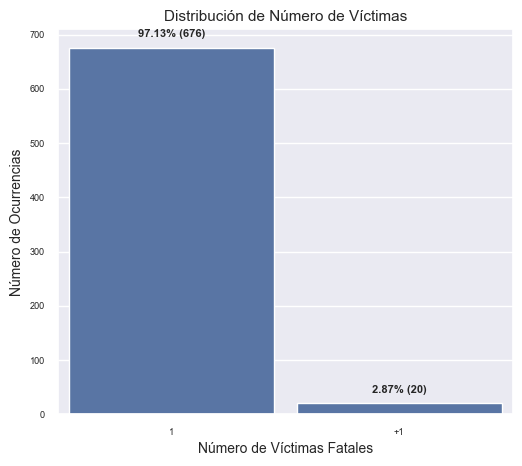

In [20]:
# Creacion de una nueva columna 'Nº víctimas' diferenciando entre 1 o mas víctimas fatales
homicidios['Nº víctimas'] = ['1' if x == 1 else '+1' for x in homicidios['N_VICTIMAS']]

plt.figure(figsize=(7, 5))

sns.set(font_scale=0.6)
ax = sns.countplot(x='Nº víctimas', data=homicidios, width=0.9)

plt.subplots_adjust(left=0.25)
plt.title('Distribución de Número de Víctimas', fontsize=11)
plt.xlabel('Número de Víctimas Fatales', fontsize=10)
plt.ylabel('Número de Ocurrencias', fontsize=10)


# Calcular el porcentaje relativo
total_datos = len(homicidios)
for p in ax.patches:
    height = p.get_height()
    porcentaje_rel = (height / total_datos) * 100

    # Agregar la cuenta exacta y el porcentaje relativo encima de cada barra
    ax.annotate(f'{porcentaje_rel:.2f}% ({int(height)})', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize=8, fontweight='bold')

plt.show()


**Número de víctimas**

El número de víctimas por accidente tiene una distribución sesgada, con una media de 1,03 víctimas por accidente. El 97,13% de los accidentes tuvieron una sola víctima, y el 2,87% de los accidentes tuvieron dos o más víctimas.

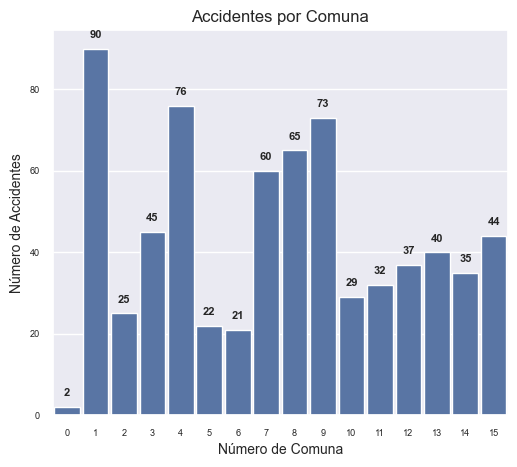

In [21]:
# COMUNA
plt.figure(figsize=(7, 5))

sns.set(font_scale=0.6)
ax = sns.countplot(x='COMUNA', data=homicidios, width=0.9)

plt.subplots_adjust(left=0.25)

plt.title('Accidentes por Comuna', fontsize=12)
plt.xlabel('Número de Comuna', fontsize=10)
plt.ylabel('Número de Accidentes', fontsize=10)

# Agregar la cuenta exacta encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, fontweight='bold')

plt.show()

Los datos proporcionados muestran que la distribución de accidentes por comuna en CABA es desigual.

- La comuna 1 tiene la mayor cantidad de accidentes, con un total de 90.
- Las comunas 4, 9, 8, 7, 3, 15, 13, 12, 14, 11 y 10 tienen entre 32 y 45 accidentes.
- Las comunas 2, 5, 6 y 0 tienen menos de 25 accidentes.

Si analizamos las zonas de CABA que corresponden a estas comunas, vemos que las comunas con mayor densidad poblacional y mayor actividad económica son las que tienen mayor cantidad de accidentes. Esto se debe a que estas comunas tienen más vehículos en circulación y más personas caminando o circulando en bicicleta.

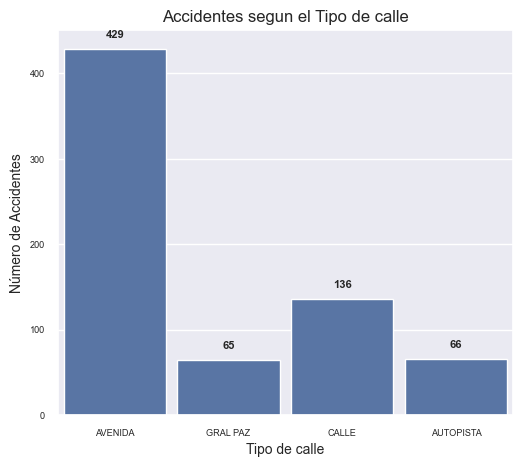

In [22]:
# TIPO_DE_CALLE

plt.figure(figsize=(7, 5))

sns.set(font_scale=0.6)
ax = sns.countplot(x='TIPO_DE_CALLE', data=homicidios, width=0.9)

plt.subplots_adjust(left=0.25)

plt.title('Accidentes segun el Tipo de calle', fontsize=12)
plt.xlabel('Tipo de calle', fontsize=10)
plt.ylabel('Número de Accidentes', fontsize=10)

# Agregar la cuenta exacta encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, fontweight='bold')

plt.show()


In [23]:
# Frecuencias segun el tipo de calle
frecuencias_TC = homicidios['TIPO_DE_CALLE'].value_counts()
# Representacion de porcentajes para cada tipo de calle
porcentajes = (frecuencias_TC / len(homicidios) * 100).round(2)

print(frecuencias_TC)
print(porcentajes)

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64
TIPO_DE_CALLE
AVENIDA      61.64
CALLE        19.54
AUTOPISTA     9.48
GRAL PAZ      9.34
Name: count, dtype: float64


**Análisis de la distribución de accidentes por tipo de calle**

Los datos muestran que las avenidas son el tipo de calle con mayor cantidad de accidentes, con 429, seguidas de las calles con 136 accidentes. Las autopistas tienen 66 accidentes y la General Paz tienen 65 accidentes. Si bien General Paz también es una autopista, se ha considerado como una categoría separada. En el caso de que la agrupáramos con el resto de las autopistas consideradas, el total de accidentes sería 131. Similar a la cantidad contabilizada en calles.

El análisis de los datos muestra que los accidentes de tránsito son más comunes en las avenidas, que son calles de mayor ancho y con más carriles. Esto se debe a que las avenidas tienen más tráfico y más usuarios vulnerables, como peatones y ciclistas. Las autopistas y General Paz tienen una proporción menor de accidentes.

| Tipo de calle | Porcentaje |
|---|---|
| Avenida | 61.64% |
| Calle | 19.54% |
| Autopista | 9.48% |
| General Paz | 9.34% |

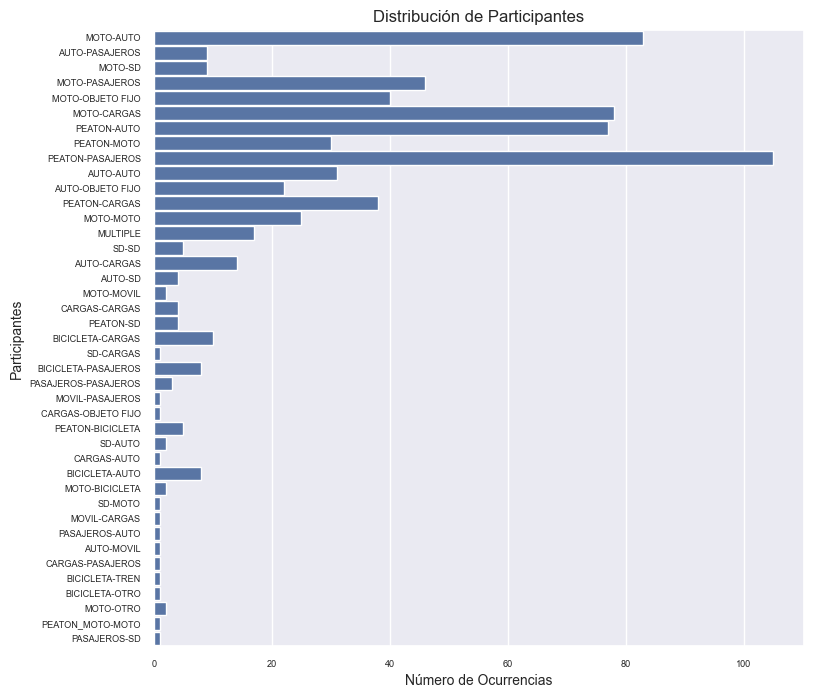

In [24]:
# PARTICIPANTES

plt.figure(figsize=(10, 8))

sns.set(font_scale=0.6)
sns.countplot(y='PARTICIPANTES', data=homicidios, width=0.9)

plt.subplots_adjust(left=0.25)

plt.title('Distribución de Participantes', fontsize=12)
plt.xlabel('Número de Ocurrencias', fontsize=10)
plt.ylabel('Participantes', fontsize=10)
plt.show()

In [25]:
# REVISAR

# Frecuencias segun los participantes
frecuencias_P = homicidios['PARTICIPANTES'].value_counts()
# Representacion de porcentajes para cada tipo de calle
porcentajes = (frecuencias_P / len(homicidios) * 100).round(2)

print(porcentajes)

PARTICIPANTES
PEATON-PASAJEROS       15.09
MOTO-AUTO              11.93
MOTO-CARGAS            11.21
PEATON-AUTO            11.06
MOTO-PASAJEROS          6.61
MOTO-OBJETO FIJO        5.75
PEATON-CARGAS           5.46
AUTO-AUTO               4.45
PEATON-MOTO             4.31
MOTO-MOTO               3.59
AUTO-OBJETO FIJO        3.16
MULTIPLE                2.44
AUTO-CARGAS             2.01
BICICLETA-CARGAS        1.44
AUTO-PASAJEROS          1.29
MOTO-SD                 1.29
BICICLETA-PASAJEROS     1.15
BICICLETA-AUTO          1.15
SD-SD                   0.72
PEATON-BICICLETA        0.72
AUTO-SD                 0.57
CARGAS-CARGAS           0.57
PEATON-SD               0.57
PASAJEROS-PASAJEROS     0.43
MOTO-OTRO               0.29
MOTO-BICICLETA          0.29
SD-AUTO                 0.29
MOTO-MOVIL              0.29
CARGAS-OBJETO FIJO      0.14
CARGAS-AUTO             0.14
MOVIL-PASAJEROS         0.14
SD-CARGAS               0.14
SD-MOTO                 0.14
MOVIL-CARGAS            0.14


In [26]:
# Filtrar el DataFrame para excluir los registros que contienen 'SD' en la columna 'VICTIMA' o 'ACUSADO'
participantes = homicidios[~(homicidios['VICTIMA'].str.contains('SD') | homicidios['ACUSADO'].str.contains('SD'))]

In [27]:
participantes[participantes['VICTIMA'] == 'MOVIL']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),PARTICIPANTES,VICTIMA,ACUSADO,Nº víctimas
116,2016-0147,1,2016-11-16,2016,11,16,21:15:00,21,AV INDEPENDENCIA Y VIRREY CEVALLOS,AVENIDA,1,Point (106817.01972475 101248.18030272),MOVIL-PASAJEROS,MOVIL,PASAJEROS,1
300,2018-0026,2,2018-03-09,2018,3,9,04:45:00,4,"Rabanal, Francisco, Intendente Av. y Saenz Av.",AVENIDA,4,Point (104283.01090451 97171.08656182),MOVIL-CARGAS,MOVIL,CARGAS,+1


In [ ]:
# Función para determinar el tipo de involucrados en los accidentes
def determinar_tipo_involucrados(involucrado):
    if involucrado == 'PEATON':
        return 'PEATON'
    elif involucrado in ['PASAJEROS', 'MOTO', 'AUTO', 'CARGAS', 'MOVIL', 'TREN']:
        return 'Motorizado'
    elif involucrado in ['OBJETO FIJO', 'BICICLETA', 'OTRO']:
        return 'No Motorizado'
    elif involucrado == 'MULTIPLE':
        return 'Multiple'
    
# Aplicar la función a la columna 'HH' y crear la columna 'VICTIMA'
participantes['V'] = participantes['VICTIMA'].apply(determinar_tipo_involucrados)

# Aplicar la función a la columna 'HH' y crear la columna 'ACUSADO'
participantes['A'] = participantes['ACUSADO'].apply(determinar_tipo_involucrados)

In [ ]:
# Función para clasificar en grupos los tipos de involucrados en los accidentes
def clasificar_en_grupos(involucrado1, involucrado2):
    if involucrado1 in ['PEATON'] and involucrado2 in ['Motorizado']:
        return 'PM'      # PEATON - V. MOTORIZADO
    elif involucrado1 in ['Motorizado'] and involucrado2 in ['PEATON']:
        return 'PM'      # PEATON - V. MOTORIZADO
    elif involucrado1 == 'Motorizado' and involucrado2 == 'Motorizado':
        return 'MM'      # V. MOTORIZADO - V. MOTORIZADO
    elif involucrado1 in ['No Motorizado'] and involucrado2 in ['Motorizado']:
        return 'NmM'     # V. NO MOTORIZADO - V. MOTORIZADO
    elif involucrado1 in ['Motorizado'] and involucrado2 in ['No Motorizado']:
        return 'NmM'     # V. NO MOTORIZADO - V. MOTORIZADO
    elif involucrado1 == 'No Motorizado' and involucrado2 == 'No Motorizado':
        return 'NN'      # V. NO MOTORIZADO - V. NO MOTORIZADO
    elif involucrado1 == 'Multiple' or involucrado2 == 'Multiple':
        return 'M'       # MULTIPLE
    
# Aplicar la función a la columna 'V' y 'A' para crear la columna 'Grupos_Part'
participantes['Grupos_Part'] = participantes.apply(lambda row: clasificar_en_grupos(row['V'], row['A']), axis=1)

In [47]:
# Cambio donde el registro para 'PARTICIPANTES' es 'PEATON_MOTO-MOTO' a 'MULTIPLE'
participantes.loc[participantes['PARTICIPANTES'] == 'PEATON_MOTO-MOTO', 'PARTICIPANTES'] = 'MULTIPLE'

In [49]:

# Cambio donde el registro para 'VICTIMA' es 'PEATON_MOTO' a 'Multiple' en la columna 'V'
participantes.loc[participantes['VICTIMA'] == 'PEATON_MOTO', 'V'] = 'Multiple' 

# Cambio donde el registro para 'VICTIMA' es 'PEATON_MOTO' a 'M' en la columna 'Grupos_Part'
participantes.loc[participantes['VICTIMA'] == 'PEATON_MOTO', 'Grupos_Part'] = 'M' 

# Cambio donde el registro para 'VICTIMA' es 'PEATON_MOTO' a 'MULTIPLE'
participantes.loc[participantes['VICTIMA'] == 'PEATON_MOTO', 'VICTIMA'] = 'MULTIPLE'

Reclasificación de participantes sin discriminar entre víctimas y acusados para reducir la cantidad de asociaciones entre los mismos. Por ejemplo, AUTO-MOTO y MOTO-AUTO se clasificarán simplemente como MOTO-AUTO.``

In [57]:
# Función para clasificar en grupos los tipos de involucrados en los accidentes
def involucrados(involucrado1, involucrado2):

    # MOTO
    if involucrado1 == 'MOTO' and involucrado2 in ['MOTO', 'AUTO', 'CARGAS','PASAJEROS', 'MOVIL', 'OTRO', 'BICICLETA', 'OBJETO FIJO']:
        return f'MOTO-{involucrado2}'
    elif involucrado1 in ['AUTO', 'CARGAS','PASAJEROS', 'MOVIL', 'OTRO', 'BICICLETA', 'OBJETO FIJO'] and involucrado2 == 'MOTO':
        return f'MOTO-{involucrado1}'
    
    # AUTO
    elif involucrado1 == 'AUTO' and involucrado2 in ['AUTO', 'CARGAS','PASAJEROS', 'MOVIL', 'OTRO', 'BICICLETA', 'OBJETO FIJO']:
        return f'AUTO-{involucrado2}'
    elif involucrado1 in ['AUTO', 'CARGAS','PASAJEROS', 'MOVIL', 'OTRO', 'BICICLETA', 'OBJETO FIJO'] and involucrado2 == 'AUTO':
        return f'AUTO-{involucrado1}'
    
    # PEATON
    elif involucrado1 == 'PEATON' and involucrado2 in ['AUTO', 'CARGAS','PASAJEROS', 'MOTO', 'BICICLETA']:
        return f'PEATON-{involucrado2}'
    
    # CARGAS
    elif involucrado1 == 'CARGAS' and involucrado2 in ['CARGAS','PASAJEROS', 'MOVIL', 'OTRO', 'OBJETO FIJO']:
        return f'CARGAS-{involucrado2}'
    elif involucrado1 in ['CARGAS','PASAJEROS', 'MOVIL', 'OTRO', 'OBJETO FIJO'] and involucrado2 == 'CARGAS':
        return f'CARGAS-{involucrado1}'
    
    # BICICLETA
    elif involucrado1 == 'BICICLETA' and involucrado2 in ['BICICLETA', 'CARGAS','PASAJEROS', 'TREN', 'OTRO', 'OBJETO FIJO']:
        return f'BICICLETA-{involucrado2}'
    elif involucrado1 in ['CARGAS','PASAJEROS', 'TREN', 'OTRO', 'OBJETO FIJO'] and involucrado2 == 'BICICLETA':
        return f'BICICLETA-{involucrado1}'
    
    # PASAJEROS
    elif involucrado1 == 'PASAJEROS' and involucrado2 in ['PASAJEROS', 'MOVIL']:
        return f'PASAJEROS-{involucrado2}'
    elif involucrado1 == 'MOVIL' and involucrado2 == 'PASAJEROS':
        return f'PASAJEROS-{involucrado1}'
    
    # MULTIPLE
    elif involucrado1 == 'MULTIPLE' or involucrado2 == 'MULTIPLE':
        return 'MULTIPLE'

In [ ]:
    
# Aplicar la función a la columna 'VICTIMA' y 'ACUSADO' para crear la columna 'Grupos_Part'
participantes['Involucrados'] = participantes.apply(lambda row: involucrados(row['VICTIMA'], row['ACUSADO']), axis=1)

In [66]:
# Frecuencias segun los grupos
frecuencias_G = participantes['Grupos_Part'].value_counts()
# Representacion de porcentajes para cada grupo
porcentajes_G = (frecuencias_G / len(participantes) * 100).round(2)

print(porcentajes_G)

Grupos_Part
MM     44.54
PM     37.37
NmM    14.50
M       2.69
NN      0.15
Name: count, dtype: float64


In [63]:
# Calculo de distribucion porcentual de accidentes entre peatones y vehiculos motorizados
porcentajes_PM = ((participantes[participantes['Grupos_Part'] == 'PM']['Involucrados'].value_counts())/ len(participantes) * 100).round(2)

# Calculo de distribucion porcentual de accidentes entre vehiculos motorizados
porcentajes_MM = ((participantes[participantes['Grupos_Part'] == 'MM']['Involucrados'].value_counts())/ len(participantes) * 100).round(2)

# Calculo de distribucion porcentual de accidentes entre vehiculos motorizados y no motorizados
porcentajes_NmM = ((participantes[participantes['Grupos_Part'] == 'NmM']['Involucrados'].value_counts())/ len(participantes) * 100).round(2)

# Calculo de distribucion porcentual de accidentes entre vehiculos no motorizados
porcentajes_NN = ((participantes[participantes['Grupos_Part'] == 'NN']['Involucrados'].value_counts())/ len(participantes) * 100).round(2)

In [64]:

print(f'''PM\n{porcentajes_PM}\n''')
print(f'''MM\n{porcentajes_MM}\n''')

PM
Involucrados
PEATON-PASAJEROS    15.70
PEATON-AUTO         11.51
PEATON-CARGAS        5.68
PEATON-MOTO          4.48
Name: count, dtype: float64

MM
Involucrados
MOTO-AUTO              12.41
MOTO-CARGAS            11.66
MOTO-PASAJEROS          6.88
AUTO-AUTO               4.63
MOTO-MOTO               3.74
AUTO-CARGAS             2.24
AUTO-PASAJEROS          1.49
CARGAS-CARGAS           0.60
PASAJEROS-PASAJEROS     0.45
PASAJEROS-MOVIL         0.15
CARGAS-MOVIL            0.15
CARGAS-PASAJEROS        0.15
Name: count, dtype: float64



In [65]:
print(f'''NmM\n{porcentajes_NmM}\n''')
print(f'''NN\n{porcentajes_NN}''')

NmM
Involucrados
MOTO-OBJETO FIJO       5.98
AUTO-OBJETO FIJO       3.29
BICICLETA-CARGAS       1.49
BICICLETA-PASAJEROS    1.20
AUTO-BICICLETA         1.20
MOTO-OTRO              0.60
MOTO-BICICLETA         0.30
CARGAS-OBJETO FIJO     0.15
AUTO-OTRO              0.15
BICICLETA-TREN         0.15
Name: count, dtype: float64

NN
Involucrados
BICICLETA-OTRO    0.15
Name: count, dtype: float64


**MM:**
Los accidentes entre vehículos motorizados son los mas frecuentes, representando el 44,54% del total. De estos, los más comunes son aquellos que incluyen motocicletas. Los accidentes entre automóviles y motocicletas, que representan el 12,41% del total de accidentes. Los accidentes entre motocicletas y transportes de carga representan el 11,66 % del total de accidentes, seguidos por los accidentes entre motocicletas y vehiculos de pasajeros con el 6,88% del total.

**PM:**
Los accidentes entre peatones y vehículos motorizados representan el 37,37% del total de accidentes. De estos, los más comunes son los accidentes entre peatones y transporte de pasajeros, que representan el 15,70% del total de accidentes. Los accidentes entre peatones y automoviles representan el 11,51% del total de accidentes.

**NmM:**
Los accidentes entre vehículos motorizados y no motorizados representan el 14,5% del total de accidentes. Esto incluye accidentes entre vehiculos motorizados y bicicletas, objetos fijos y otros vehículos no motorizados, como carritos de bebé o sillas de ruedas. Los mas comunes son aquellos entre motocicletas y objetos fijos, que representan el 5,98% del total.

**M:**
Los accidentes multiples, que involucran a más de un vehículo o a un vehículo y un peatón o un vehículo no motorizado, representan el 2,69% del total de accidentes.

**NN:**
Los accidentes menos frecuentes de los que se tienen registro son entre vehículos no motorizados, los cuales solo representan el 0,15% del total de accidentes. La mayor parte de estos accidentes son entre bicicletas y otros.

Estos resultados son consistentes con los datos de accidentes de tráfico de otras ciudades del mundo. Los peatones y los conductores de vehículos motorizados son los usuarios más vulnerables de la carretera, y son los que más probabilidades tienen de sufrir lesiones o la muerte en un accidente.

Grupos_Part
MM     44.54
PM     37.37
NmM    14.50
M       2.69
NN      0.15
Name: count, dtype: float64


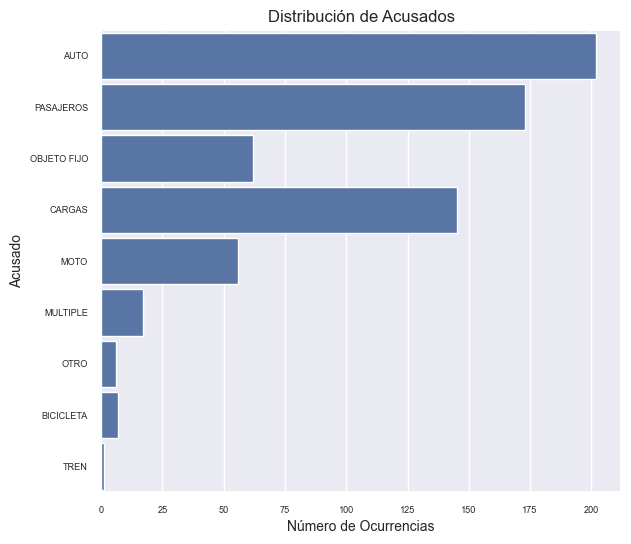

ACUSADO
AUTO           30.19
PASAJEROS      25.86
CARGAS         21.67
OBJETO FIJO     9.27
MOTO            8.37
MULTIPLE        2.54
BICICLETA       1.05
OTRO            0.90
TREN            0.15
Name: count, dtype: float64


In [101]:
# ACUSADO

# Distribucion ACUSADOS
distribucion_acusados = ((participantes['ACUSADO'].value_counts()) / len(participantes) * 100).round(2)

print(porcentajes_G)

plt.figure(figsize=(8, 6))

sns.set(font_scale=0.6)
sns.countplot(y='ACUSADO', data=participantes, width=0.9)

plt.subplots_adjust(left=0.25)

plt.title('Distribución de Acusados', fontsize=12)
plt.xlabel('Número de Ocurrencias', fontsize=10)
plt.ylabel('Acusado', fontsize=10)
plt.show()

print(distribucion_acusados)

Los resultados muestran que los automóviles son los vehículos más involucrados en accidentes viales, con una participación del 30,19%. Le siguen los vehículos de pasajeros, con una participación del 25,86%, y los vehículos de cargas, con una participación del 21,67%.

Los objetos fijos son el cuarto tipo de causa accidentes fatales, con una participación del 9,27%. Le siguen las motocicletas, con una participación del 8,37%.

Los accidentes que involucran varios vehículos representan el 2,54% del total. Los accidentes que involucran bicicletas representan el 1,05% del total. Los accidentes que involucran otros vehículos representan el 0,90% del total. Los accidentes que involucran trenes representan el 0,15% del total.

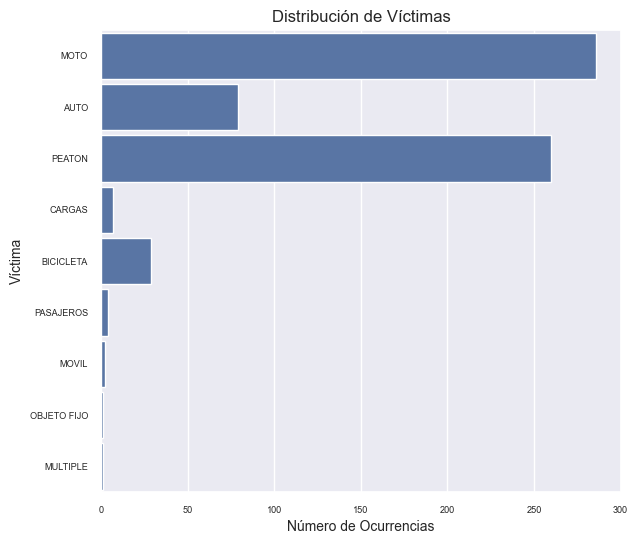

VICTIMA
MOTO           42.75
PEATON         38.86
AUTO           11.81
BICICLETA       4.33
CARGAS          1.05
PASAJEROS       0.60
MOVIL           0.30
OBJETO FIJO     0.15
MULTIPLE        0.15
Name: count, dtype: float64


In [100]:
# VICTIMA

# Distribucion VICTIMAS
distribucion_victimas = ((participantes['VICTIMA'].value_counts()) / len(participantes) * 100).round(2)

plt.figure(figsize=(8, 6))

sns.set(font_scale=0.6)
sns.countplot(y='VICTIMA', data=participantes, width=0.9)

plt.subplots_adjust(left=0.25)

plt.title('Distribución de Víctimas', fontsize=12)
plt.xlabel('Número de Ocurrencias', fontsize=10)
plt.ylabel('Víctima', fontsize=10)
plt.show()

print(distribucion_victimas)

Los resultados muestran que las motocicletas son las víctimas más comunes en los accidentes viales, con una participación del 42,75%. Le siguen los peatones, con una participación del 38,86%, y los automóviles, con una participación del 11,81%.

Las bicicletas son el cuarto tipo de víctima más común en los accidentes viales, con una participación del 4,33%. Le siguen los vehículos de carga, con una participación del 1,05%, los vehículos de pasajeros, con una participación del 0,60%, los móviles, con una participación del 0,30%, los objetos fijos, con una participación del 0,15%, y los accidentes múltiples, con una participación del 0,15%.

In [72]:
homicidios_HH = homicidios[homicidios['HH'] != 'SD']

In [82]:
# Distribución historica
n_ocurrencias_historica = homicidios_HH['AAAA'].value_counts()
distribución_historica = (n_ocurrencias_historica / len(homicidios_HH) * 100).round(2)

# Distribución anual
n_ocurrencias_anual = homicidios_HH['MM'].value_counts()
distribución_anual = (n_ocurrencias_anual / len(homicidios_HH) * 100).round(2)

# Distribución mensual
n_ocurrencias_mensual = homicidios_HH['DD'].value_counts()
distribución_mensual = (n_ocurrencias_mensual / len(homicidios_HH) * 100).round(2)

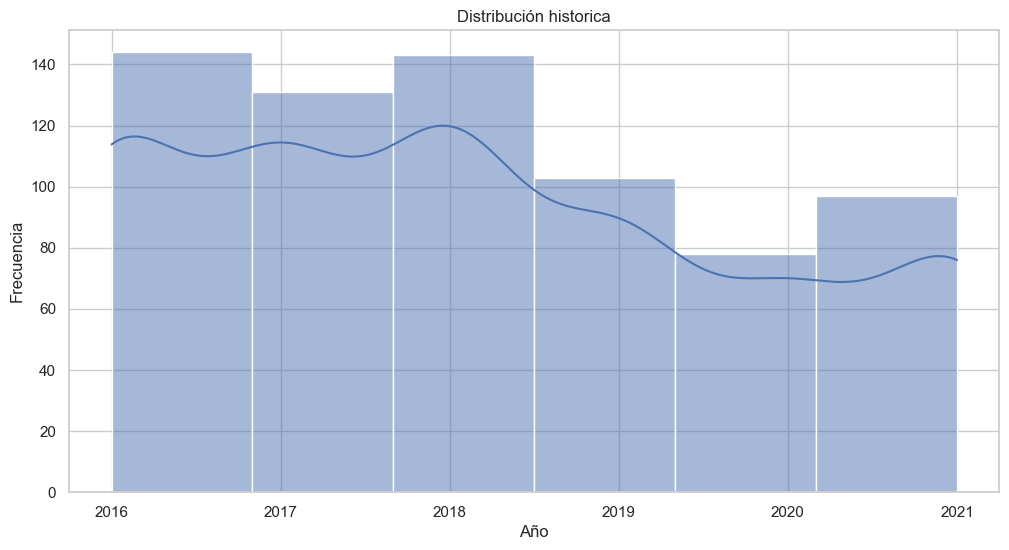

AAAA
2016    144
2018    143
2017    131
2019    102
2021     97
2020     78
Name: count, dtype: int64
AAAA
2016    20.72
2018    20.58
2017    18.85
2019    14.68
2021    13.96
2020    11.22
Name: count, dtype: float64


In [84]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de distribución historica
plt.figure(figsize=(12, 6))
sns.histplot(data=homicidios, x='AAAA', bins=len(homicidios['AAAA'].unique()), kde=True)
plt.title('Distribución historica')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

print(n_ocurrencias_historica)
print(distribución_historica)

Según los datos proporcionados, la distribución de accidentes a lo largo de los años se puede describir de la siguiente manera:

- Los años 2016 y 2018 fueron los más críticos, con más de 140 accidentes cada uno.
- 2017 muestra una leve disminución con 131 accidentes.
- A partir de 2019, la disminución se vuelve más acentuada, con descensos importantes en el número de accidentes: 102 en 2019, 97 en 2021 y 78 en 2020.

Esta disminución en la distribución porcentual de accidentes puede deberse a una serie de factores, como las mejoras en la seguridad vial, el aumento de la concienciación sobre la seguridad vial y el desarrollo de nuevas tecnologías de seguridad.

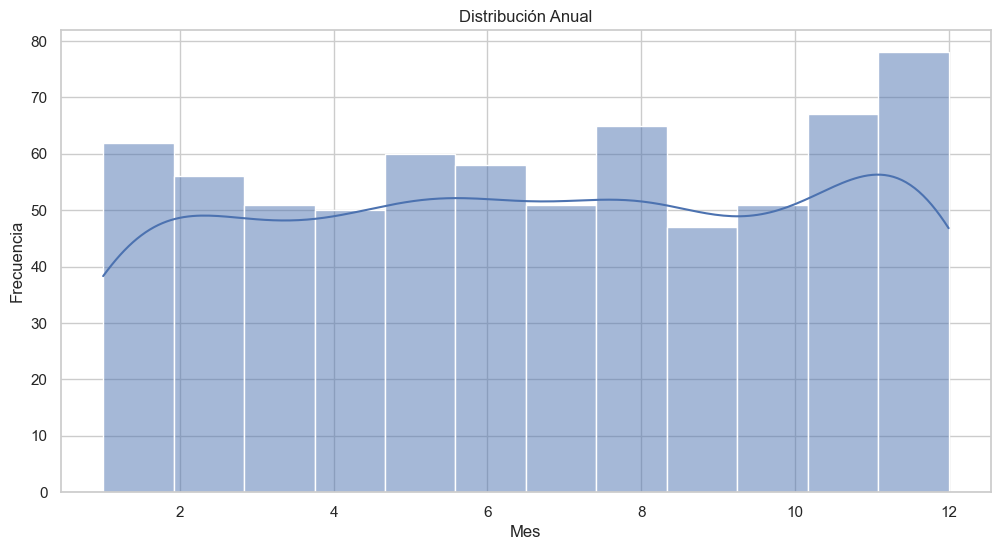

MM
12    77
11    67
8     65
1     62
5     60
6     58
2     56
3     51
7     51
10    51
4     50
9     47
Name: count, dtype: int64
MM
12    11.08
11     9.64
8      9.35
1      8.92
5      8.63
6      8.35
2      8.06
3      7.34
7      7.34
10     7.34
4      7.19
9      6.76
Name: count, dtype: float64


In [85]:

# Crear un gráfico de distribución anual
plt.figure(figsize=(12, 6))
sns.histplot(data=homicidios, x='MM', bins=12, kde=True)
plt.title('Distribución Anual')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

print(n_ocurrencias_anual)
print(distribución_anual)

De acuerdo con la información proporcionada, la distribución de accidentes por mes se puede describir de la siguiente manera:

* **En general, el número de accidentes es mayor en los meses de verano (noviembre, diciembre, enero) y menor hacia principios de otoño y primavera (febrero, marzo, abril, septiembre y octubre).**
* **Los meses con mayor número de accidentes son diciembre (77 accidentes) y noviembre (67 accidentes), con un porcentaje de 11.08% y 9.64%, respectivamente.**
* **Los meses con menor número de accidentes son febrero (56 accidentes) y marzo (51 accidentes), con un porcentaje de 8.06% y 7.34%, respectivamente.**

Esta distribución de accidentes puede deberse a una serie de factores, como:

* **Las actividades sociales.** Los meses de verano suelen ser más activos en términos de actividades sociales, como vacaciones, fiestas y eventos deportivos, lo que puede aumentar la exposición al riesgo de accidentes.
* **El aumento de la movilidad.** Los meses de verano suelen ser más populares para viajar, lo que puede aumentar el número de vehículos en circulación en autopistas y, por lo tanto, el riesgo de accidentes.

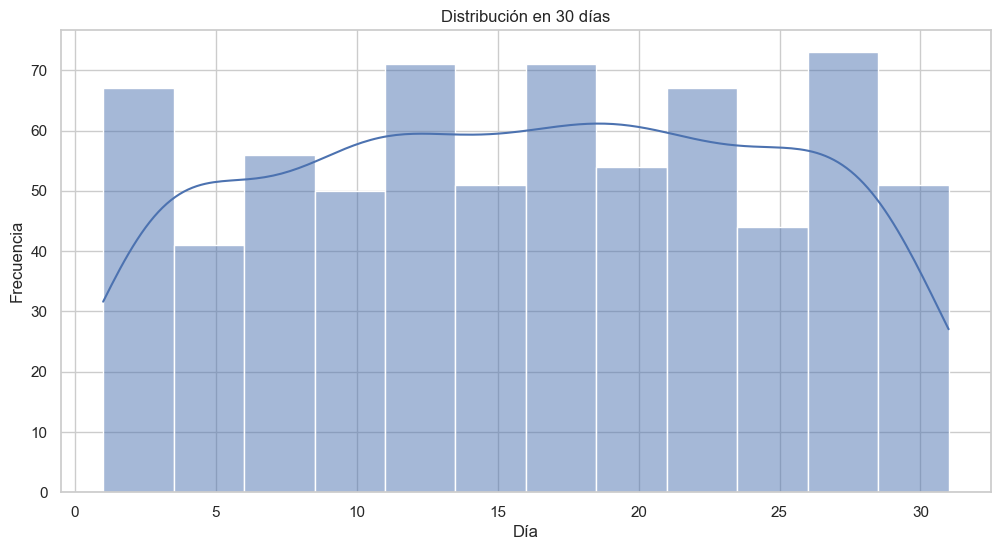

DD
20    31
17    30
3     27
11    27
27    27
12    26
14    26
28    25
10    25
9     25
15    25
23    24
25    24
4     23
7     23
22    23
19    23
2     22
29    22
18    22
26    21
24    20
21    20
6     19
16    18
13    18
5     18
1     18
30    16
8     14
31    13
Name: count, dtype: int64
DD
20    4.46
17    4.32
3     3.88
11    3.88
27    3.88
12    3.74
14    3.74
28    3.60
10    3.60
9     3.60
15    3.60
23    3.45
25    3.45
4     3.31
7     3.31
22    3.31
19    3.31
2     3.17
29    3.17
18    3.17
26    3.02
24    2.88
21    2.88
6     2.73
16    2.59
13    2.59
5     2.59
1     2.59
30    2.30
8     2.01
31    1.87
Name: count, dtype: float64


In [86]:
# Crear un gráfico de distribución mensual
plt.figure(figsize=(12, 6))
sns.histplot(data=homicidios, x='DD', bins=12, kde=True)
plt.title('Distribución en 30 días')
plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.show() 

print(n_ocurrencias_mensual)
print(distribución_mensual)

De acuerdo con la información proporcionada, la distribución de accidentes por día se puede describir de la siguiente manera:

* **En general, el número de accidentes es mayor a mediados de mes y menor a principios y finales de mes.**
* **Los días con mayor número de accidentes son el 20 (31 accidentes) y el 17 (30 accidentes), con un porcentaje de 4.46% y 4.32%, respectivamente.**
* **Los días con menor número de accidentes son el 30 (16 accidentes) y el 8 (14 accidentes), con un porcentaje de 2.30% y 2.01%, respectivamente.**

Esta distribución de accidentes puede deberse a una serie de factores, como:

* **El tráfico.** El tráfico suele ser más intenso a mediados de mes, cuando las personas van y vienen del trabajo, la escuela y otras actividades.
* **La fatiga.** Las personas suelen estar más fatigadas a mediados de mes, después de una semana de trabajo o escuela.
* **El alcohol.** El consumo de alcohol suele ser más común a mediados de mes, cuando las personas celebran el fin de semana o salen de fiesta.


Aquí hay algunos puntos específicos que vale la pena mencionar:

* **Los días con mayor número de accidentes tienden a ser días laborables.** Esto puede deberse a que el tráfico es más intenso en los días laborables, cuando las personas van y vienen del trabajo.
* **Los días con menor número de accidentes tienden a ser fines de semana.** Esto puede deberse a que el tráfico es más ligero en los fines de semana, cuando las personas tienen más tiempo libre para descansar y divertirse.
* **Hay una serie de días con un número similar de accidentes.** Esto puede deberse a que los factores que influyen en la ocurrencia de accidentes, como el tráfico, la fatiga y el alcohol, suelen variar de un día a otro.

En general, la distribución de accidentes por día parece ser bastante uniforme. No hay días con un número de accidentes significativamente mayor o menor que otros. Esto sugiere que los factores que influyen en la ocurrencia de accidentes están presentes en todos los días del mes. El único factor que vale destacar es la densidad del transito, el cual es siempre proporcional a los momentos donde ocurren mas accidentes.

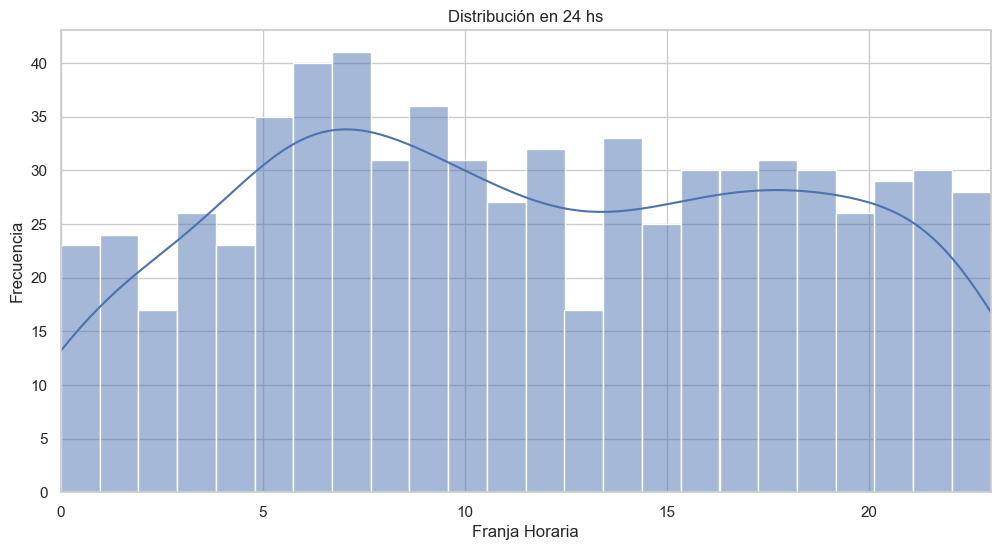

In [38]:
# Filtrar el DataFrame para excluir los registros con 'SD' en la columna 'HH'
homicidios_HH = homicidios[homicidios['HH'] != 'SD']

# Gráfico de distribución diario
plt.figure(figsize=(12, 6))
sns.histplot(data=homicidios_HH, x='HH', bins=24, kde=True)
plt.title('Distribución en 24 hs')
plt.xlabel('Franja Horaria')
plt.ylabel('Frecuencia')
plt.xlim(0, 23)
plt.show()

In [ ]:
# Función para determinar franjas horarias distintivas segun un primer analisis del grafico
def determinar_franja(hora):
    if 5 <= hora <= 9:
        return '5-9'
    elif 10 <= hora <= 13:
        return '10-13'
    elif 14 <= hora <= 22:
        return '14-22'
    elif hora in [0,1,2,3,4,23]:
        return '23-4'
    else:
        return 'Otra Franja'  # Puedes ajustar esto según tus necesidades

# Aplicar la función a la columna 'HH' y crear la columna 'FH'
homicidios_HH['FH'] = homicidios_HH['HH'].apply(determinar_franja)


In [40]:
# Conteo de frecuencias de las franjas horarias definidas
frecuencias_FH = homicidios_HH['FH'].value_counts()
# Representacion de porcentajes para cada franja
porcentajes = (frecuencias_FH / len(homicidios_HH) * 100).round(2)

print(frecuencias_FH)
print(porcentajes)

FH
14-22    264
5-9      183
23-4     141
10-13    107
Name: count, dtype: int64
FH
14-22    37.99
5-9      26.33
23-4     20.29
10-13    15.40
Name: count, dtype: float64



**Análisis de la distribución de accidentes por hora del día**

Los datos proporcionados muestran que la distribución de accidentes por hora del día en CABA es desigual. La mayor cantidad de accidentes ocurre entre las 5:00 y las 9:00, con un total de 183 accidentes en un lapso de 5 horas.

Los accidentes también ocurren con frecuencia entre las 14:00 y las 22:00, con un total de 264 accidentes en un lapso de 9 horas.

- La mayor concentración de accidentes ocurre entre las 5:00 y las 9:00, lo que representa el 26,33% de los accidentes.
- Las horas entre las 5:00 y las 9:00 tienen un total del 22,07% de los accidentes.
- Las horas entre las 14:00 y las 22:00 tienen un total del 37,99% de los accidentes.
- Las horas entre las 10:00 y 13:00 tienen un total del 15,40% de los accidentes.

Los accidentes son menos comunes durante las horas del amanecer y alrededor del medio día, con un total de 248 accidentes en un total de 10 horas. En conjunto, estos accidentes representan el 37,47% de los accidentes.

El promedio de eventos por hora se sugiere que hay aproximadamente 29 eventos por hora.

El análisis de los datos muestra que los accidentes de tránsito son más comunes durante las horas pico de la mañana y la tarde, cuando hay más vehículos en circulación. Se observa que las horas del día con menor cantidad de accidentes coinciden con las horas del día con menor flujo de vehículos en CABA.
Estos hallazgos sugieren que el flujo de vehículos es un factor importante que contribuye a la ocurrencia de accidentes de tránsito.

# Analisis Bivariado:

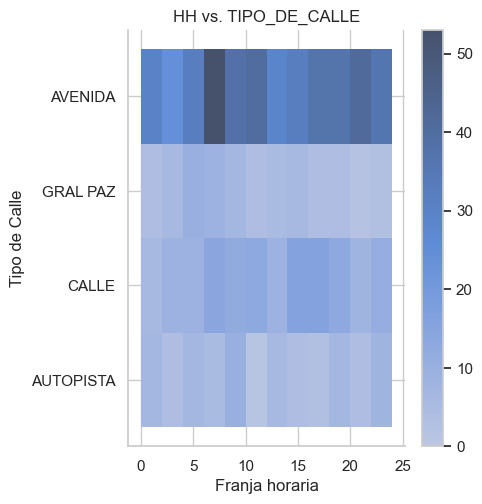

In [42]:
sns.displot(homicidios_HH, x="HH", y="TIPO_DE_CALLE", binwidth=(2, .5), cbar=True)
plt.title('HH vs. TIPO_DE_CALLE')
plt.xlabel('Franja horaria')
plt.ylabel('Tipo de Calle')
plt.show()

**Distribución de accidentes viales por franja horaria y tipo de calle**

Los resultados del análisis sugieren que los accidentes viales se concentran en las primeras horas de la mañana, tanto en avenidas como en calles. Esto puede deberse a una serie de factores, como:

* **El tráfico.** El tráfico suele ser más intenso en las primeras horas de la mañana, cuando las personas van y vienen del trabajo.
* **La fatiga.** Las personas suelen estar más fatigadas en las primeras horas de la mañana, después de una noche de sueño.
* **La distracción.** Las personas suelen estar más distraídas en las primeras horas de la mañana, por ejemplo, por la prisa por llegar al trabajo.

En el caso de la Avenida General Paz, la concentración de accidentes en las primeras horas de la mañana puede deberse a que es una vía de acceso importante a la ciudad, por lo que el tráfico es especialmente intenso en ese momento.

En el caso de las Autopistas, la concentración de accidentes en las primeras horas de la mañana puede deberse a que es un tipo de vía que se utiliza para viajar largas distancias, por lo que las personas suelen estar más fatigadas y distraídas.

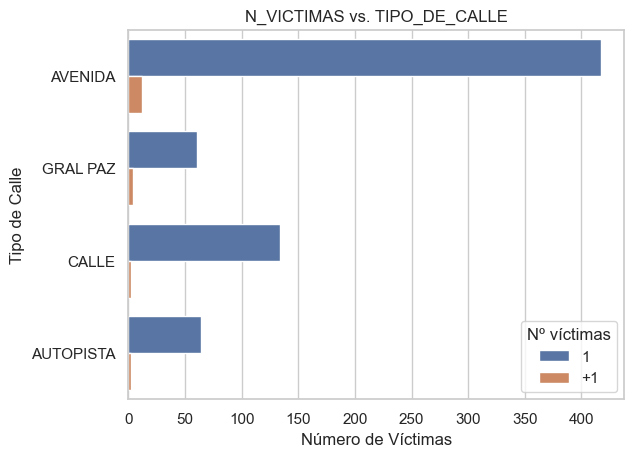

In [43]:
# Crear una nueva columna 'Categoria' basada en la condición de N_VICTIMAS
homicidios['Nº víctimas'] = ['1' if x == 1 else '+1' for x in homicidios['N_VICTIMAS']]

#sns.catplot(data=homicidios, x="N_VICTIMAS", y="TIPO_DE_CALLE", hue="Categoria", kind="strip", height=6, aspect=1.5)
sns.countplot(data=homicidios, y="TIPO_DE_CALLE", hue="Nº víctimas")
plt.title('N_VICTIMAS vs. TIPO_DE_CALLE')
plt.xlabel('Número de Víctimas')
plt.ylabel('Tipo de Calle')
plt.show()

* **El número de accidentes con más de una víctima fatal es mayor en las avenidas porque suelen tener mayor velocidad y flujo vehicular que otros tipos de calles.**

* **La velocidad y el flujo vehicular más altos pueden aumentar el riesgo de colisiones graves, especialmente cuando los conductores no respetan las leyes de tránsito.**
* **Las avenidas también suelen tener menos espacio para que los conductores se detengan de manera segura, lo que puede contribuir a los accidentes.**

Además de los factores mencionados anteriormente, también es importante considerar el tipo de accidente. Los accidentes frontales, por ejemplo, son más propensos a causar lesiones graves o la muerte que los accidentes laterales o traseros.

De acuerdo con un estudio realizado por la Administración Nacional de Seguridad del Tráfico en las Carreteras de los Estados Unidos (NHTSA), las avenidas son el tipo de calle con mayor probabilidad de sufrir un accidente con más de una víctima fatal. El estudio encontró que los accidentes en avenidas tenían un 50% más de probabilidades de causar lesiones graves o la muerte que los accidentes en otras carreteras.

Estas cifras sugieren que es importante tomar medidas para reducir la velocidad y el flujo vehicular en las avenidas, así como para mejorar la seguridad de las mismas.

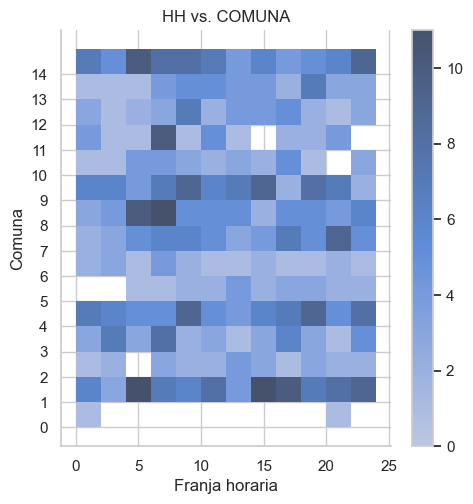

In [90]:
# Gráfico de barras para comparar COMUNA y HH

sns.displot(data=homicidios_HH, x="HH", y="COMUNA", binwidth=(2, 1), cbar=True)
plt.title('HH vs. COMUNA')
plt.xlabel('Franja horaria')
plt.ylabel('Comuna')
plt.yticks(range(15))
plt.show()

In [99]:
# Configurar opciones de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Calcular la tabla de frecuencias
tabla_frecuencias = pd.crosstab(index=homicidios_HH['COMUNA'], columns=homicidios_HH['HH'], margins=True, margins_name='Total')

# Mostrar la tabla de frecuencias
tabla_frecuencias


HH,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
COMUNA,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
1,3,3,1,2,3,8,4,3,2,4,5,3,3,1,9,2,4,6,2,5,2,6,7,2,90
2,0,1,1,1,0,0,1,2,2,0,1,1,3,1,1,2,1,0,2,1,1,1,1,1,25
3,0,3,2,5,1,2,5,3,0,2,2,1,1,0,2,1,4,2,1,2,0,1,1,4,45
4,5,2,4,2,3,2,1,4,5,4,5,0,2,2,4,2,4,3,7,2,3,2,4,4,76
5,0,0,0,0,0,1,1,0,1,1,0,2,2,2,1,1,0,3,1,2,0,2,1,1,22
6,1,1,2,1,0,1,2,2,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,0,21
7,0,2,0,3,3,2,4,2,1,5,2,3,2,1,2,2,2,5,2,3,3,6,2,3,60
8,1,2,0,4,4,6,5,6,3,2,5,0,2,3,2,0,1,4,4,1,3,1,5,1,65


**Número de accidentes registrados en las diversas comunas en función de la hora del día.**

1. **Horas con mayor frecuencia:**
   - Las horas con mayor frecuencia de eventos parecen ser entre las 5 y las 10, con un pico en la hora 8.
   - Las horas 14, 15, 16, 17, y 18 también muestran un número significativo de eventos.

2. **Comunas con mayor frecuencia:**
   - La Comuna 1 tiene la mayor frecuencia total con 90 eventos.
   - Otras comunas con frecuencias notables son la Comuna 4 (76 eventos), la Comuna 8 (65 eventos), y la Comuna 9 (73 eventos).

3. **Combinaciones específicas:**
   - Las combinaciones de hora y Comuna con mayor frecuencia son la Comuna 1 con una frecuencia significativa en las horas 14 y 15, mientras que la Comuna 4 tiene una alta frecuencia en la hora 18. La Comuna 8 tiene mayor frecuencia entre las horas 5 y 8, y la Comuna 9 entre las horas 6 y 8. Cabe destacar que en las Comunas con mayor indice de accidentes, estos ocurres en la misma franja horaria, entre las 5 y 9 de la mañana. Lo que se corresponde con lo observado anteriormente en el análisis de la distribución de accidentes según la hora del día.

4. **Horas o comunas con baja frecuencia:**
   - Algunas horas y comunas tienen baja o nula frecuencia, lo que puede indicar períodos de menor actividad o áreas menos propensas a eventos. La Comuna 0 es donde menos accidentes se produjeron, con un total de 2 accidentes en total.

# **Conclusiones**

* Los accidentes de tránsito fatales son más comunes en las horas pico de la mañana y la tarde, cuando hay más vehículos en circulación.
* Los accidentes de tránsito fatales son más comunes en las avenidas, que suelen tener mayor velocidad y flujo vehicular que otros tipos de calles.
* Los peatones y los conductores de vehículos motorizados son los usuarios más vulnerables de la carretera, y son los que más probabilidades tienen de sufrir lesiones o la muerte en un accidente.
* Las motocicletas son los vehículos más involucrados en accidentes viales, seguidos de los automóviles y los peatones.

**Recomendaciones para reducir la cantidad de accidentes de tránsito fatales:**

* Tomar medidas para reducir la velocidad y el flujo vehicular en las avenidas.
* Mejorar la seguridad de las avenidas, por ejemplo, instalando reductores de velocidad y barreras de seguridad.
* Educar a los conductores y peatones sobre la seguridad vial.

**Medidas específicas que podrían implementarse en CABA:**

* Señalizar las comunas con mayor índice de accidentes, especialmente en las horas pico.
* Realizar campañas de concientización sobre la seguridad vial en las comunas con mayor índice de accidentes.
* Mejorar la infraestructura de las calles y avenidas de las comunas con mayor índice de accidentes.

La implementación de estas medidas podría ayudar a reducir la cantidad de accidentes de tránsito fatales en CABA y mejorar la seguridad de los usuarios de la vía pública.